In [1]:
# Description: This code compares the chosen stock's cumulative returns with the nifty benchmark to find the beta parameter of the stock
# further, it calculates the expected returns of the stock using the CAPM model assuming expected market returns as 8% and risk free rate 
# as 6%.
# Note: this code is generalised such that any stock can be taken in as chosen stock. All the instances say 'stock' instead of a specific
# stock name. Here INFY(NSE) is taken as an example

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Choose stock

chosen_stock = 'INFY.NS'

In [4]:
# Getting stock and nifty data

stock = yf.download(chosen_stock, interval='1d', period='1y')
stock.reset_index(inplace=True)
nifty = yf.download('^NSEI', interval='1d', period='1y')
nifty.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-29,1404.900024,1409.849976,1393.000000,1398.650024,1347.058350,6119965
1,2022-09-30,1388.949951,1419.300049,1376.000000,1413.449951,1361.312500,8120130
2,2022-10-03,1412.000000,1412.000000,1386.000000,1393.750000,1342.339233,4943169
3,2022-10-04,1419.699951,1432.250000,1414.000000,1429.400024,1376.674194,6631341
4,2022-10-06,1445.000000,1459.800049,1444.099976,1455.150024,1401.474243,6180672
...,...,...,...,...,...,...,...
244,2023-09-25,1489.849976,1489.849976,1471.550049,1474.150024,1474.150024,4217863
245,2023-09-26,1479.150024,1479.900024,1459.000000,1460.650024,1460.650024,3996528
246,2023-09-27,1456.000000,1469.599976,1450.050049,1467.000000,1467.000000,3863586
247,2023-09-28,1467.900024,1472.599976,1435.000000,1439.449951,1439.449951,5814602


In [6]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-29,16993.599609,17026.050781,16788.599609,16818.099609,16818.099609,340000
1,2022-09-30,16798.050781,17187.099609,16747.699219,17094.349609,17094.349609,376100
2,2022-10-03,17102.099609,17114.650391,16855.550781,16887.349609,16887.349609,278400
3,2022-10-04,17147.449219,17287.300781,17117.300781,17274.300781,17274.300781,226000
4,2022-10-06,17379.250000,17428.800781,17315.650391,17331.800781,17331.800781,265500
...,...,...,...,...,...,...,...
244,2023-09-25,19678.199219,19734.150391,19601.550781,19674.550781,19674.550781,188400
245,2023-09-26,19682.800781,19699.349609,19637.449219,19664.699219,19664.699219,204900
246,2023-09-27,19637.050781,19730.699219,19554.000000,19716.449219,19716.449219,203600
247,2023-09-28,19761.800781,19766.650391,19492.099609,19523.550781,19523.550781,352800


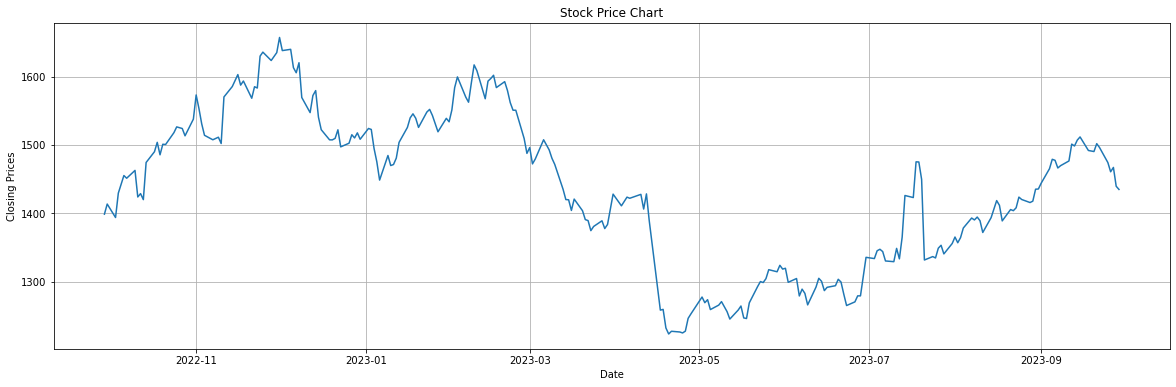

In [7]:
# Plotting stock price chart

plt.figure(figsize=(20,6))
plt.plot(stock['Date'], stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Stock Price Chart')
plt.grid(True)

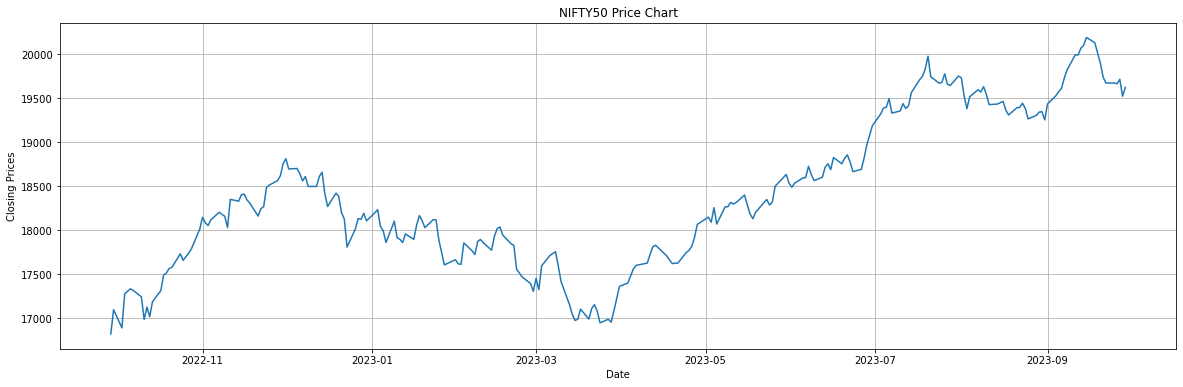

In [8]:
# plotting NIFTY50 price chart

plt.figure(figsize=(20,6))
plt.plot(nifty['Date'], nifty['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('NIFTY50 Price Chart')
plt.grid(True)

In [9]:
# Calculating daily and cumulative returns for stock and nifty 

stock['Daily_Returns'] = stock['Close'].pct_change()
nifty['Daily_Returns'] = nifty['Close'].pct_change()

stock['Cumulative_Returns'] = (1 + stock['Daily_Returns']).cumprod()
nifty['Cumulative_Returns'] = (1 + nifty['Daily_Returns']).cumprod()

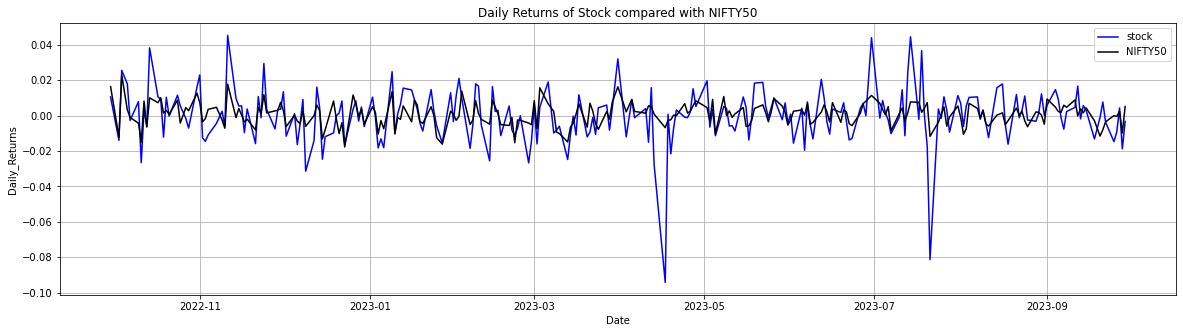

In [10]:
# Comparing daily returns of stock and nifty

plt.figure(figsize=(20,5))
plt.plot(stock['Date'], stock['Daily_Returns'], label='stock', color='blue')
plt.plot(nifty['Date'], nifty['Daily_Returns'], label='NIFTY50', color='black')
plt.xlabel('Date')
plt.ylabel('Daily_Returns')
plt.title('Daily Returns of Stock compared with NIFTY50')
plt.grid(True)
plt.legend()

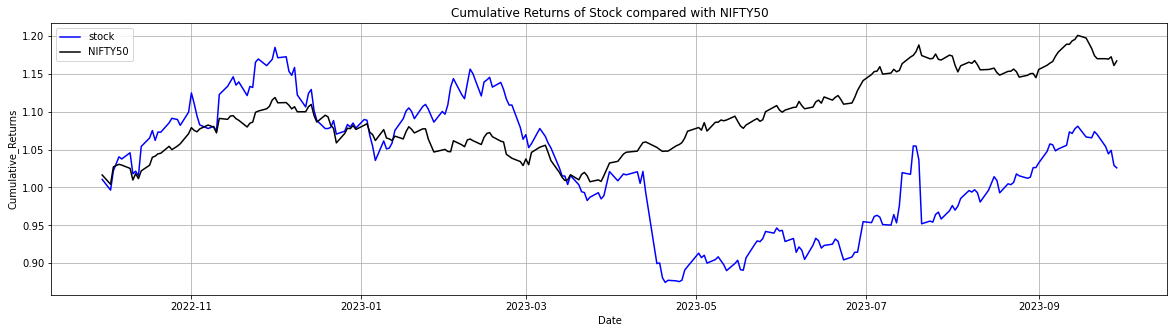

In [11]:
# Comparing cumulative returns of stock and nifty

plt.figure(figsize=(20,5))
plt.plot(stock['Date'], stock['Cumulative_Returns'], label='stock', color='blue')
plt.plot(nifty['Date'], nifty['Cumulative_Returns'], label='NIFTY50', color='black')
plt.xlabel('Date')
plt.ylabel('Cumulative_Returns')
plt.title('Cumulative Returns of Stock compared with NIFTY50')
plt.grid(True)
plt.legend()

In [12]:
# Linear Regression to get CAPM parameters

stock_returns = stock['Daily_Returns'].dropna().values
nifty_returns = nifty['Daily_Returns'].dropna().values

X = np.vstack([nifty_returns, np.ones(len(nifty_returns))]).T
y = stock_returns

beta, alpha = np.linalg.lstsq(X, y, rcond=None)[0]

In [13]:
# Getting r squared value

y_pred = X.dot([beta, alpha])
y_mean = np.mean(y)
r_value = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y_mean) ** 2))

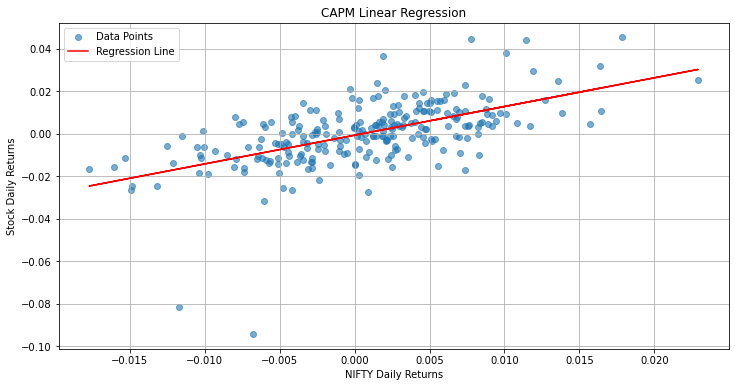

In [14]:
# Plotting linear regression

plt.figure(figsize=(12, 6))
plt.scatter(nifty_returns, stock_returns, label='Data Points', alpha=0.6)
plt.plot(nifty_returns, y_pred, color='red', label='Regression Line')
plt.title('CAPM Linear Regression')
plt.xlabel('NIFTY Daily Returns')
plt.ylabel('Stock Daily Returns')
plt.legend()
plt.grid(True)

In [15]:
beta

1.352199459094384

In [16]:
alpha

-0.000653904583370107

In [17]:
r_value

0.3419124509535305

In [18]:
# expected Returns of INFY using CAPM formula: 
# Expected Returns = Rf + beta * (Expected Market Returns - Rf)   
# Rf = risk free rate (assuming 6%)
# assuming Expected market returns to be 12%

rf = 0.06
rm = 0.12
re = rf + beta * (rm-rf)
returns_percent = re *100

In [19]:
re

0.14113196754566304

In [20]:
returns_percent

14.113196754566303